In this project, we create a model that predicts healthcare costs using a regression algorithm.

We are using a dataset that contains information about different people including their healthcare costs. We use the data to predict healthcare costs based on new data.

The first two cells of the notebook import libraries and the data.

We make sure to convert categorical data to numbers and we use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

We `pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels` and use these labels when training the model.

We then create the model and train it with the `train_dataset`. We run the final cell in this notebook to check if our model acheives the target we want. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

The target for the model is that it must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [2]:
%pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset

--2022-05-23 17:41:13--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-05-23 17:41:13 (112 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['sex'], prefix='sex')], axis=1)
dataset.drop('sex', axis=1, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['smoker'], prefix='smoker')], axis=1)
dataset.drop('smoker', axis=1, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['region'], prefix='region')], axis=1)
dataset.drop('region', axis=1, inplace=True)

dataset

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [5]:
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

print(x_columns)
print(x)
print(y)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[[19.  27.9  0.  ...  0.   0.   1. ]
 [18.  33.8  1.  ...  0.   1.   0. ]
 [28.  33.   3.  ...  0.   1.   0. ]
 ...
 [18.  36.9  0.  ...  0.   1.   0. ]
 [21.  25.8  0.  ...  0.   0.   1. ]
 [61.  29.1  0.  ...  1.   0.   0. ]]
[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [6]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)
print(train_dataset)
print(test_dataset)
print(train_labels)
print(test_labels)

[[23.  23.8  0.  ...  0.   0.   0. ]
 [30.  31.6  3.  ...  0.   1.   0. ]
 [45.  35.3  0.  ...  0.   0.   1. ]
 ...
 [43.  23.2  0.  ...  0.   0.   1. ]
 [26.  29.5  1.  ...  0.   1.   0. ]
 [18.  28.3  1.  ...  0.   0.   0. ]]
[[33.  29.4  4.  ...  0.   0.   1. ]
 [29.  22.5  3.  ...  0.   0.   0. ]
 [21.  29.   0.  ...  1.   0.   0. ]
 ...
 [28.  31.7  0.  ...  0.   1.   0. ]
 [54.  31.6  0.  ...  0.   0.   1. ]
 [63.  21.7  1.  ...  1.   0.   0. ]]
[ 2395.17  4837.58  7348.14 ...  6250.44  3392.37 11272.33]
[ 6059.17  5209.58  1906.36 13390.56  3766.88  2974.13  4266.17  9432.93
 19539.24  2396.1  25992.82 25678.78  1711.03 19515.54  3171.61  3659.35
  5400.98  1242.82  4877.98  7151.09  2566.47 13204.29 17626.24 11326.71
  1646.43  7935.29 15359.1   9877.61  4746.34  1163.46 11165.42 51194.56
  6548.2  19040.88 47305.31 13887.97  3021.81 24873.38 10601.41 42124.52
  9174.14  1256.3   6753.04  5272.18  6123.57 34828.65 24476.48  1743.21
 37701.88  4779.6   9361.33  1708.    2302.3  

In [27]:
model = keras.models.Sequential()
model.add(layers.Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                600       
                                                                 
 dense_13 (Dense)            (None, 25)                1275      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'], optimizer='adam')
history = model.fit(train_dataset, train_labels, epochs=500, validation_data=(test_dataset, test_labels), verbose=2)

Epoch 1/500
34/34 - 1s - loss: 13176.7471 - mean_absolute_error: 13176.7471 - mean_squared_error: 318734336.0000 - val_loss: 13572.9492 - val_mean_absolute_error: 13572.9492 - val_mean_squared_error: 336215648.0000 - 577ms/epoch - 17ms/step
Epoch 2/500
34/34 - 0s - loss: 13149.6572 - mean_absolute_error: 13149.6572 - mean_squared_error: 317965376.0000 - val_loss: 13527.8008 - val_mean_absolute_error: 13527.8008 - val_mean_squared_error: 334907136.0000 - 106ms/epoch - 3ms/step
Epoch 3/500
34/34 - 0s - loss: 13072.0723 - mean_absolute_error: 13072.0723 - mean_squared_error: 315793248.0000 - val_loss: 13407.9365 - val_mean_absolute_error: 13407.9365 - val_mean_squared_error: 331449856.0000 - 105ms/epoch - 3ms/step
Epoch 4/500
34/34 - 0s - loss: 12896.4229 - mean_absolute_error: 12896.4229 - mean_squared_error: 310955360.0000 - val_loss: 13164.1191 - val_mean_absolute_error: 13164.1191 - val_mean_squared_error: 324512384.0000 - 105ms/epoch - 3ms/step
Epoch 5/500
34/34 - 0s - loss: 12571.71

9/9 - 0s - loss: 2672.8982 - mean_absolute_error: 2672.8982 - mean_squared_error: 32160026.0000 - 30ms/epoch - 3ms/step
Testing set Mean Abs Error: 2672.90 expenses
The model predicted the health care costs below $3500. Great job!


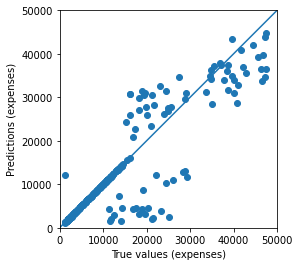

In [31]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("The model predicted the health care costs below $3500. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)